Business questions we would like answered on this data set?
- What factors influence whether an individual earns more than 50K annually?
- What is the relationship between occupation and income levels?
- How does the level of education impact the income levels of individuals?

## CRISP-DM Framework
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

### Loading Relevant Packages and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

### Data Cleaning and Preparation

In [2]:
#reading in csv file
df = pd.read_csv('adult_cencus.csv', delimiter = ';')

In [3]:
#view contents of the data
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
#output columns
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [5]:
#establish target variable distribution
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [6]:
#size of the data
df.shape

(32561, 15)

In [7]:
#drop irrelevant data
df = df.drop(['fnlwgt'], axis= 1)

### Data Analysis and Exploration

In [8]:
#distribution of workclass column
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [9]:
#distribution of marital status column
df['marital_status'].value_counts()

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [10]:
#distribution of occupation column
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [11]:
#distribution of sex/gender
df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

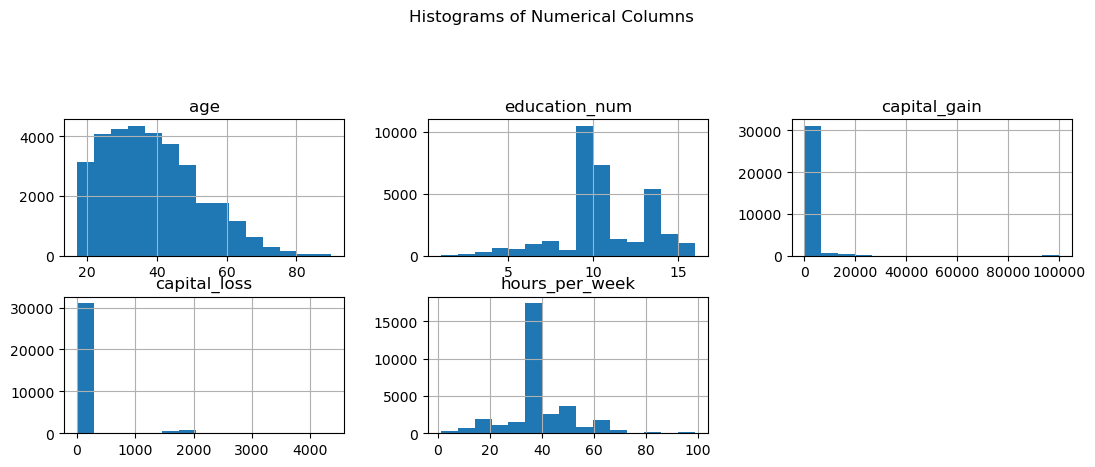

In [12]:
# Plot histograms for all numerical columns
def plot_numerical_histograms(df):
    """
    Plots histograms for all numerical columns in the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data to plot.

    Returns:
    None
    """
    df.hist(bins=15, figsize=(13, 11), layout=(5, 3))
    plt.suptitle('Histograms of Numerical Columns')
    plt.show()

# Example usage
plot_numerical_histograms(df)

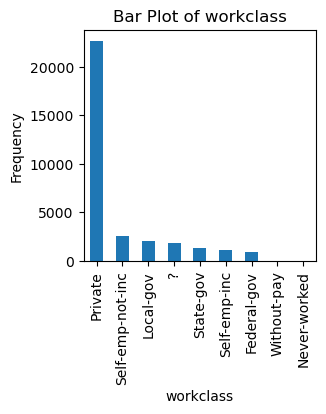

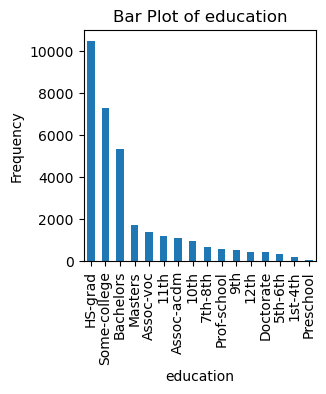

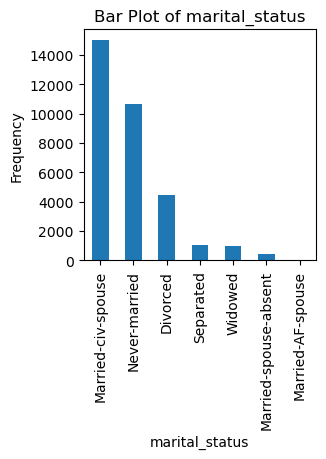

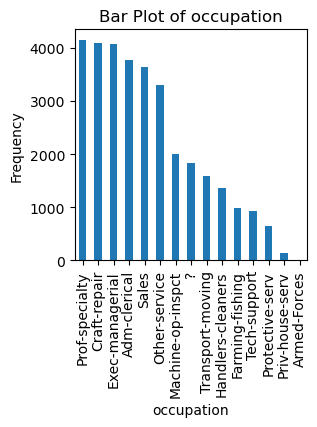

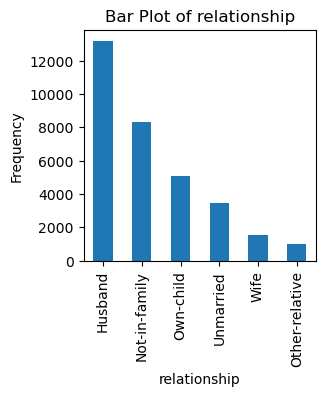

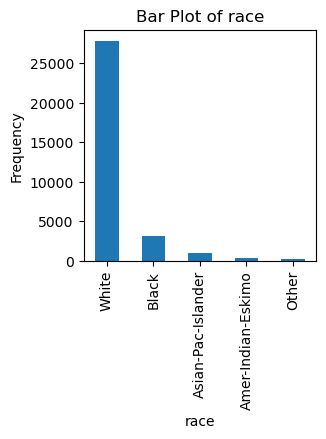

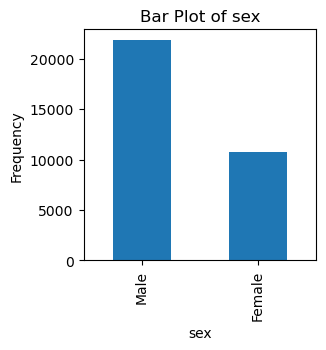

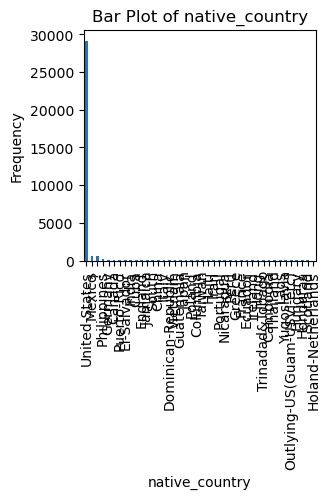

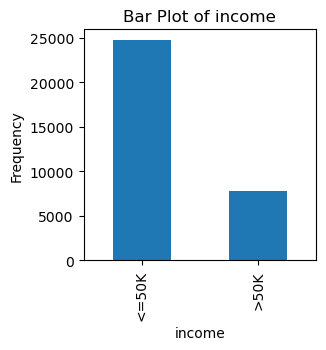

In [13]:
# Plot bar plots for all categorical columns
def plot_categorical_bars(df):
    """
    Plots bar plots for all categorical columns in the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data to plot.

    Returns:
    None
    """
    cat_cols = df.select_dtypes(include=['object']).columns

    for col in cat_cols:
        plt.figure(figsize=(3, 3))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Bar Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Example usage
plot_categorical_bars(df)

In [14]:
# Data Preprocessing
## Handle missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [15]:
#percentage of nulls per column
most_missing_cols = df.isnull().mean() * 100
most_missing_cols
#very few records have null values so they can be dropped

age               0.0
workclass         0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income            0.0
dtype: float64

In [16]:
#drop null values
df.dropna(inplace=True)

In [17]:
#display data
df.head(5)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


### Data Preprocessing for Modelling

In [18]:
## Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [19]:
# Calculate correlation matrix
correlation_matrix = df.corr()

print(correlation_matrix)

                     age  workclass  education  education_num  marital_status  \
age             1.000000   0.080540  -0.001111       0.043526       -0.276373   
workclass       0.080540   1.000000   0.017855       0.037833       -0.034241   
education      -0.001111   0.017855   1.000000       0.345410       -0.040664   
education_num   0.043526   0.037833   0.345410       1.000000       -0.063419   
marital_status -0.276373  -0.034241  -0.040664      -0.063419        1.000000   
occupation     -0.005682   0.015572  -0.038212       0.087717        0.022655   
relationship   -0.246456  -0.067417  -0.012717      -0.091935        0.177964   
race            0.023374   0.044731   0.011154       0.032805       -0.068627   
sex             0.081993   0.074973  -0.027888       0.006157       -0.119813   
capital_gain    0.080154   0.035350   0.030575       0.124416       -0.042418   
capital_loss    0.060165   0.007204   0.015028       0.079646       -0.035203   
hours_per_week  0.101599   0

In [20]:
# Model Training and Evaluation for Question 1: What factors influence whether an individual earns more than 50K annually?
## Define features and target variable
X = df.drop('income', axis=1)
y = df['income']

In [ ]:
## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
## Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:

## Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
## Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [26]:
## Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8460135919111553
Confusion Matrix:
 [[4180  353]
 [ 576  924]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4533
           1       0.72      0.62      0.67      1500

    accuracy                           0.85      6033
   macro avg       0.80      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



In [27]:
## Feature Importance
feature_importances = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

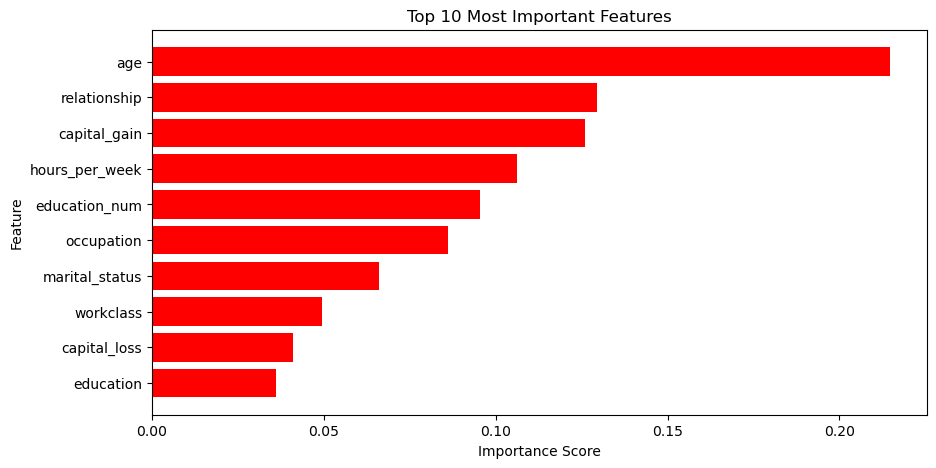

In [30]:
# Plot
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='red')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

What is the relationship between occupation and income levels?

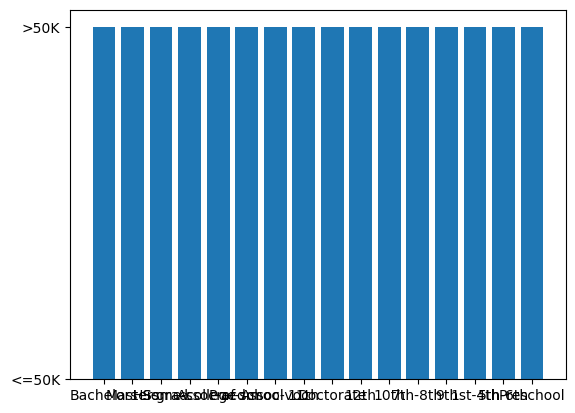

In [41]:
plot_df = df.sort_values(by = 'income', ascending = False)

plt.bar(plot_df['education'], height = df['income'])
plt.show()

In [39]:
df['occupation'].value_counts()

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='occupation', y='income', data=df)
plt.title('Income Levels by Education')
plt.xticks(rotation=45)
plt.show()